In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def ForwardDiffusion(x_0, steps, delta):
    current = x_0
    places = []
    for i in tqdm(range(steps)):
        F = - 2 *current 
        x_n = current + F * delta / 2 + np.sqrt(delta) * np.random.normal(0, 1)
        places.append(x_n)
        current = x_n
    return places

In [3]:
def P(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

100%|██████████| 100000/100000 [00:00<00:00, 677380.15it/s]


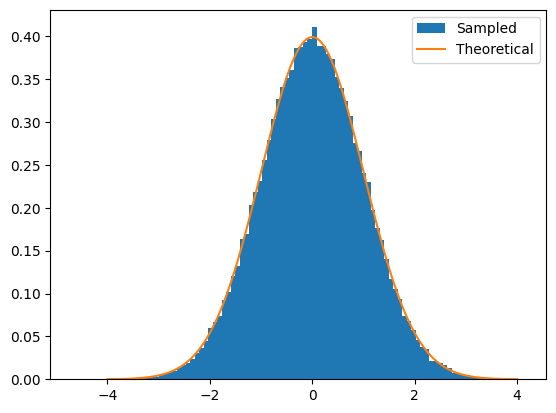

In [4]:
places = ForwardDiffusion(0, 100000, 1)
plt.hist(places[1000:], label="Sampled", density=True, bins=100)
# plt.hist()
# plt.hist(np.linspace(0, 9000, 9000), places[1000:])
x = np.linspace(-4, 4, 500)
plt.plot(x, P(x), label= "Theoretical")
# plt.hist(np.random.normal(0, 1, 9000), alpha=0.3, label="Uniform", density=True, bins=100)
plt.legend()


In [5]:
def ForwardDiffusionv2(x_0, steps, delta):
    places = []
    current = x_0
    for i in tqdm(range(steps)):
        x_n = current + np.sqrt(delta) * np.random.normal(0, np.sqrt(delta))
        # A = np.exp(-(x_n**2/2 - current**2/2) + 1)
        if np.exp((current**2 - x_n**2)/2) > np.random.uniform():
            places.append(x_n)
            current = x_n
        # cutoff = np.exp(delta*(current - x_n)*((-current) + (-x_n)) + ((delta/2)**2)*(current**2 - x_n**2))
        # if (np.random.uniform() < cutoff):
        #     places.append(x_n)
    return places

100%|██████████| 100000/100000 [00:00<00:00, 289761.73it/s]


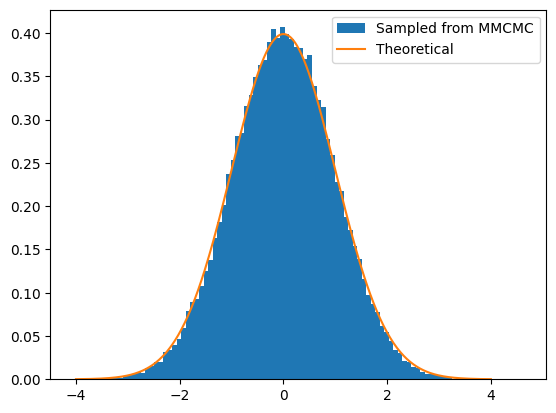

In [6]:
places = ForwardDiffusionv2(0, 100000, 1)
plt.hist(places[1000:], bins=100, density=True, label="Sampled from MMCMC")
x = np.linspace(-4, 4, 500)
plt.plot(x, P(x), label= "Theoretical")
plt.legend()

In [7]:
def ForwardDiffusionv2_2(x_0, steps, delta):
    places = []
    current = x_0
    for i in tqdm(range(steps)):
        F = - 2 *current 
        x_n = current + F * delta / 2 + np.random.normal(0, np.sqrt(delta))
        A = np.exp(delta*(current - x_n)*((-current) + (-x_n)) + ((delta/2)**2)*(current**2 - x_n**2))
        if (np.random.uniform() < A):
            places.append(x_n)
    return places

100%|██████████| 100000/100000 [00:00<00:00, 322437.12it/s]


1.0


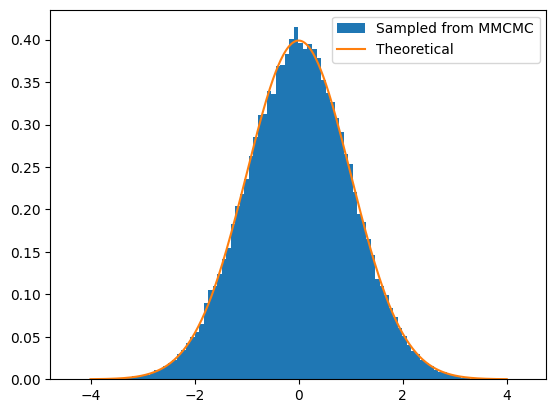

In [8]:
places = ForwardDiffusionv2_2(0, 100000, 1)
plt.hist(places[1000:], bins=100, density=True, label="Sampled from MMCMC")
x = np.linspace(-4, 4, 500)
plt.plot(x, P(x), label= "Theoretical")
plt.legend()
print(len(places) / 100000)

In [9]:
beta = np.linspace(0.0001, 0.05, 200,dtype=np.float32)

In [10]:
def ForwardDiffusionv3_1(x_0, steps, beta_t):
    places = []
    current = x_0
    for i in tqdm(range(steps)):
        # F = - 2 *current 
        x_n = current * np.sqrt(1 - beta_t[i]) + np.sqrt(beta_t[i]) * np.random.normal(0, 1)
        places.append(x_n)
        current = x_n
        # A = np.exp(delta*(current - x_n)*((-current) + (-x_n)) + ((delta/2)**2)*(current**2 - x_n**2))
        # if (np.random.uniform() < A):
            # places.append(x_n)
    return places
        
    
def ForwardDiffusionv3_2(x_0, steps, beta_t):
    current = x_0
    for i in (range(steps)):
        x_n = current * np.sqrt(1 - beta_t[i]) + np.sqrt(beta_t[i]) * np.random.normal(0, 1)
        current = x_n
    return current

100%|██████████| 200/200 [00:00<?, ?it/s]


Text(0.5, 1.0, '5 runs of forward diffusion')

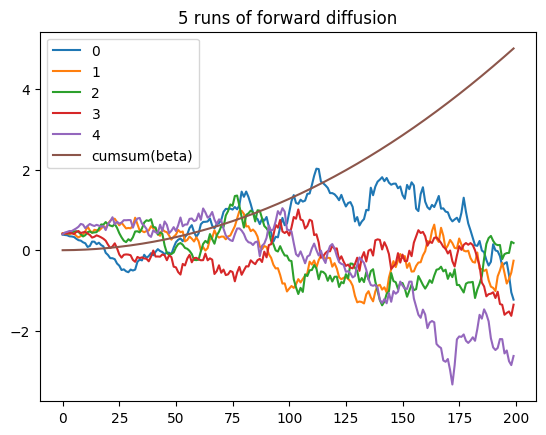

In [11]:
for i in range(5):
    places = ForwardDiffusionv3_1(0.4, 200, beta)
    plt.plot(places, label=f"{i}")
plt.plot(np.cumsum(beta), label="cumsum(beta)")
plt.legend()
plt.title("5 runs of forward diffusion")


In [12]:
ends = []
for i in tqdm(range(10000)):
    ends.append(ForwardDiffusionv3_2(0.4, 200, beta))

100%|██████████| 10000/10000 [00:06<00:00, 1592.43it/s]


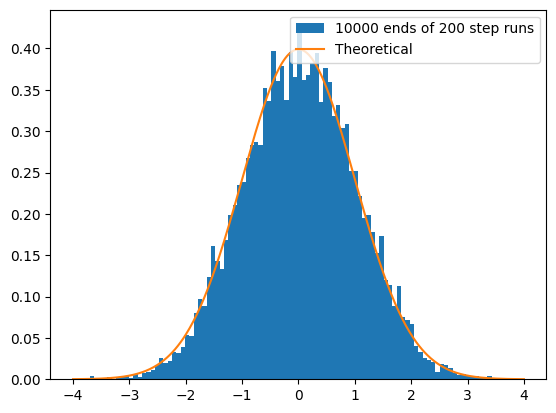

In [13]:
plt.hist(ends, bins=100, density=True, label="10000 ends of 200 step runs")
plt.plot(x, P(x), label= "Theoretical")
plt.legend()

In [14]:
def ForwardDiffusionFast(x_0, steps, alpha_bar):
    return np.sqrt(alpha_bar[steps]) * x_0 + np.sqrt(1 - alpha_bar[steps]) * np.random.normal(0, 1)

def ForwardDiffusionFast2(x_0, steps, alpha_bar):
    N = np.random.normal(0, 1)
    return (np.sqrt(alpha_bar[steps]) * x_0 + np.sqrt(1 - alpha_bar[steps]) * N, N)

In [15]:
alpha = [1 - b for b in beta]
alpha_bar = [np.prod(alpha[:i]) for i in range(len(alpha))]
print(alpha_bar)

[1.0, 0.9999000000025262, 0.9995492813011739, 0.9989480448631651, 0.9980966800831516, 0.9969957644391757, 0.9956460626150935, 0.9940485260275144, 0.9922042912481667, 0.9901146790077385, 0.987781192621055, 0.9852055159551976, 0.9823895115213086, 0.9793352180015046, 0.9760448484757535, 0.9725207870598147, 0.968765586254452, 0.9647819638617202, 0.9605727994789599, 0.9561411319248708, 0.9514901540063256, 0.9466232100286555, 0.9415437917718434, 0.9362555329830473, 0.9307622063683705, 0.9250677190883404, 0.919176106814594, 0.9130915306937385, 0.9068182707145657, 0.9003607219777219, 0.8937233895427179, 0.8869108819205197, 0.8799279074172806, 0.8727792670366618, 0.8654698502264234, 0.8580046288838836, 0.8503886517198718, 0.8426270393627353, 0.8347249762367819, 0.8266877072022242, 0.8185205309589711, 0.8102287942405462, 0.8018178867553595, 0.7932932330953693, 0.7846602892298155, 0.7759245359526334, 0.7670914731274281, 0.7581666146826915, 0.749155480776645, 0.7400635943508485, 0.7308964748362824

100%|██████████| 100000/100000 [00:00<00:00, 622873.27it/s]


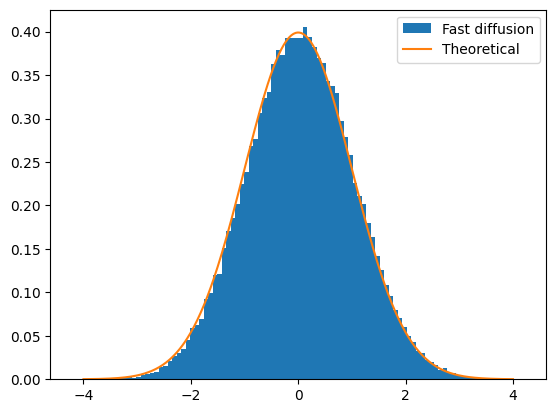

In [16]:
ends = []
for i in tqdm(range(100000)):
    ends.append(ForwardDiffusionFast(0.4, 199, alpha_bar))
plt.hist(ends, bins=100, density=True, label="Fast diffusion")
plt.plot(x, P(x), label= "Theoretical")
plt.legend()

# Undiffusion

In [96]:
# saving for when I mess all this up
beta = np.linspace(0.0001, 0.05, 200,dtype=np.float32)
alpha = [1 - b for b in beta]
alpha_bar = [np.prod(alpha[:i]) for i in range(len(alpha))]

# def undiffuse(x_t, t):
#     s_t = (1 - alpha[t]) / np.sqrt(1 - alpha_bar[t])
#     Beta_squiggle = (1 - alpha_bar[t-1]) * beta[t] / (1 - alpha[t])
#     nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
#     if (t == 0):
#         nom = 0
#     return (1 / np.sqrt(alpha[t])) * (x_t - s_t * GuessZ(x_t, t)) + nom



def GuessZ(x_t, alphaBar_t, x0=0.4):
    return (1/np.sqrt(1-alphaBar_t)) * (x_t-np.sqrt(alphaBar_t) * x0)

def SamplePInit():
    return 0.4

a = [1 - b for b in beta]
alphaBar_ts = [np.prod(a[:i]) for i in range(len(a))]

def RunUndiffuse(start_t, final_t, x_t, guess_function):
    timestep = start_t
    x_guesses = []
    x_ns = [np.copy(x_t)]
    while timestep != final_t:
        t = timestep
        
        alphaBar_t = alphaBar_ts[timestep]
        s_t = (1 - a[timestep-1]) / np.sqrt(1 - alphaBar_t)
        if timestep == final_t+1:
            # print(s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))
            # print(0.4 - x_t)
            # print((s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))/(0.4 - x_t))
            nom = 0
        else:
            Beta_squiggle = (1 - alphaBar_ts[timestep-1]) * beta[t] / (1 - alphaBar_t)
            nom = np.sqrt(Beta_squiggle) * np.random.normal()
        x_ns.append((1 / np.sqrt(alpha[timestep-1])) * (x_ns[-1] - s_t * guess_function(x_ns[-1], alphaBar_t)) + nom)
        x_guesses.append((x_ns[-1] - np.sqrt(1 - alphaBar_t) * guess_function(x_ns[-1], alphaBar_t))/np.sqrt(alphaBar_t))
        # x_ns.append(undiffuse(x_ns[-1], timestep))
        timestep -= 1
    return x_ns, x_guesses

In [18]:
# # def undiffuse(x_t, t):
# #     s_t = (1 - alpha[t]) / np.sqrt(1 - alpha_bar[t])
# #     Beta_squiggle = (1 - alpha_bar[t-1]) * beta[t] / (1 - alpha[t])
# #     nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
# #     if (t == 0):
# #         nom = 0
# #     return (1 / np.sqrt(alpha[t])) * (x_t - s_t * GuessZ(x_t, t)) + nom
# beta = np.linspace(0.0001, 0.05, 200,dtype=np.float32)
# alpha = [1 - b for b in beta]
# alpha_bar = [np.prod(alpha[:i]) for i in range(len(alpha))]

# def GuessZ(x_t, t, x0=0.4):
#     return (1/np.sqrt(1-alpha_bar[t])) * (x_t-(np.sqrt(alpha_bar[t]) * x0))
# print(GuessZ(0.39, 2))

# def SamplePInit():
#     return 0.4

# def RunUndiffuse(start_t, final_t, x_t, guess_function):
#     timestep = start_t
#     x_ns = [np.copy(x_t)]
#     while timestep != final_t:
#         x_t = x_ns[-1]
#         t = timestep
#         s_t = (1 - alpha[t]) / np.sqrt(1 - alpha_bar[t])
#         if timestep == final_t+1:
#             nom = 0
#         else:
#             Beta_squiggle = (1 - alpha_bar[t-1]) * beta[t] / (1 - alpha_bar[t])
#             nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
#         x_ns.append((1 / np.sqrt(alpha[timestep])) * (x_t - s_t * guess_function(x_t, t)) + nom)
#         # x_ns.append(undiffuse(x_ns[-1], timestep))
#         timestep -= 1
#     return x_ns

In [97]:
n = 50
a = [1-b for b in beta]
a_T = np.prod(a[:n])
print(a_T)
print(alpha_bar[n])
print(RunUndiffuse(199, 00, np.random.uniform(0, 10), GuessZ))

0.7308964748362824
0.7308964748362824
([array(8.76480102), 8.701474725726028, 8.290596094495754, 7.844488788987114, 7.343912339756404, 7.041013812088447, 6.594500223375994, 6.1965468165810975, 5.904971179332928, 5.679015385422023, 5.169290665316343, 4.892985026604449, 4.8057542731876275, 4.583532271822895, 4.690902468322105, 4.583089226859152, 4.576766823096094, 4.041258046149005, 3.979555233830968, 3.6056242268734904, 3.676953773792386, 3.6949312241097023, 3.8711389353629984, 3.7307464451630947, 3.738988254657994, 3.7191902801293972, 3.566673407246894, 3.726119795241191, 3.4683996188629664, 3.662850210212837, 3.539821221616853, 3.402560421369662, 3.566631715249521, 3.8410364657074476, 4.011210578844034, 4.0568281596924605, 3.939053856671163, 3.867827703556771, 4.018109150956703, 3.901891527714224, 3.4826799303194687, 3.5074907333853274, 3.450722695987072, 3.4110967183213736, 3.53124428299146, 3.5715741485063157, 3.672207781634339, 4.0598993554700264, 4.266839708147282, 3.8618996569003

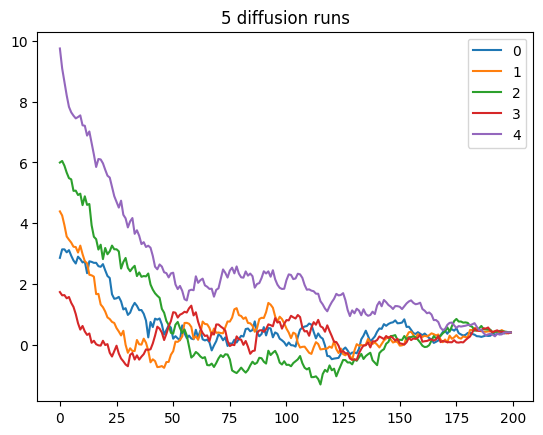

In [98]:
for i in range(5):
    plt.plot(RunUndiffuse(199, 00, np.random.uniform(0, 10), GuessZ)[0], label=f"{i}")
plt.title("5 diffusion runs")
plt.legend()

In [99]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuse(199, 00, 0.4, GuessZ)[0][-1])

100%|██████████| 1000/1000 [00:01<00:00, 939.36it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion')

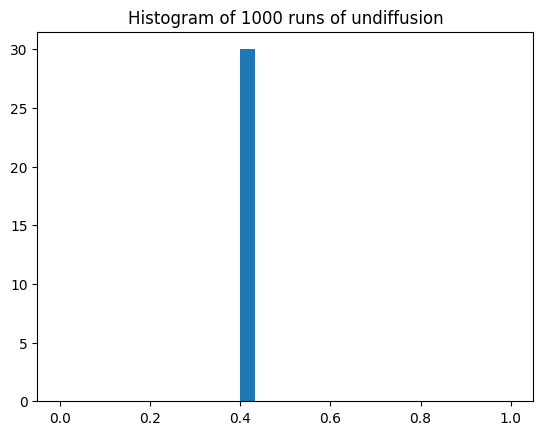

In [100]:
plt.hist(out, density=True, bins=30, range=[0, 1])
plt.title("Histogram of 1000 runs of undiffusion")

In [101]:
ffd = []
ud = []
for i in tqdm(range(10000)):
    ffd.append(ForwardDiffusionFast(0.4, 125, alpha_bar))
    ud.append(RunUndiffuse(199, 125, 0, GuessZ)[0][-1])

100%|██████████| 10000/10000 [00:03<00:00, 2527.15it/s]


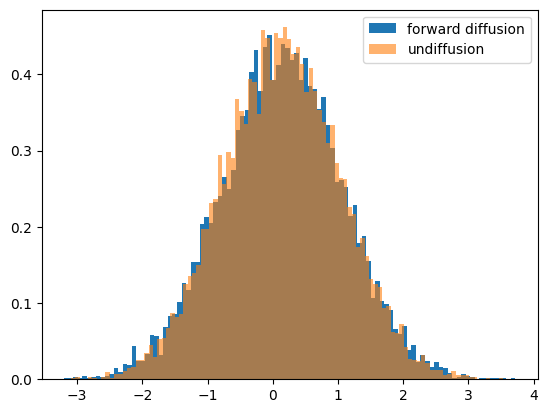

In [102]:
plt.hist(ffd, label="forward diffusion", bins = 100, density=True)
plt.hist(ud, label="undiffusion", alpha=0.6, bins=100, density=True)
plt.legend()

In [103]:
def NewGuessZ(x_t, alphaBar_t):
    za = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*0.4)
    zb = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*-0.6)
    ea = np.exp(-(za**2)/2)
    eb = np.exp(-(zb**2)/2)
    return (0.8 * za * ea + 0.2 * zb * eb) / (0.8 * ea + 0.2 * eb)

def SamplePInit():
    x_inits = [0.4, -0.6]
    return np.random.choice(x_inits, p=[0.8, 0.2])


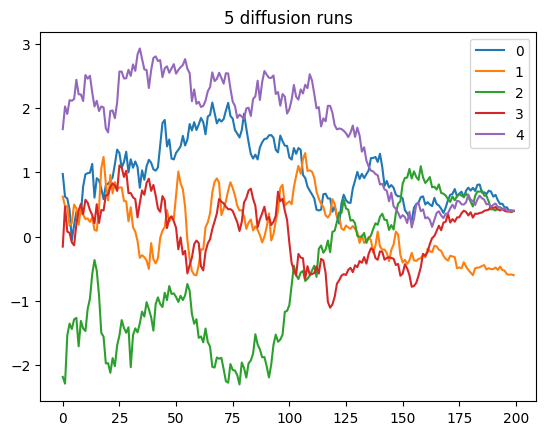

In [104]:
for i in range(5):
    plt.plot(RunUndiffuse(199, 00, np.random.uniform(-3, 5), NewGuessZ)[0], label=f"{i}")
plt.title("5 diffusion runs")
plt.legend()

100%|██████████| 1000/1000 [00:01<00:00, 509.53it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion')

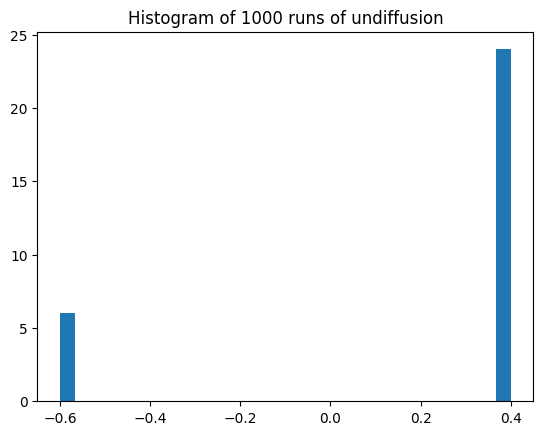

In [105]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuse(199, 00, 0.4, NewGuessZ)[0][-1])
plt.hist(out, density=True, bins=30)
plt.title("Histogram of 1000 runs of undiffusion")

100%|██████████| 10/10 [00:00<00:00, 358.91it/s]


Text(0.5, 1.0, 'Guesses vs time')

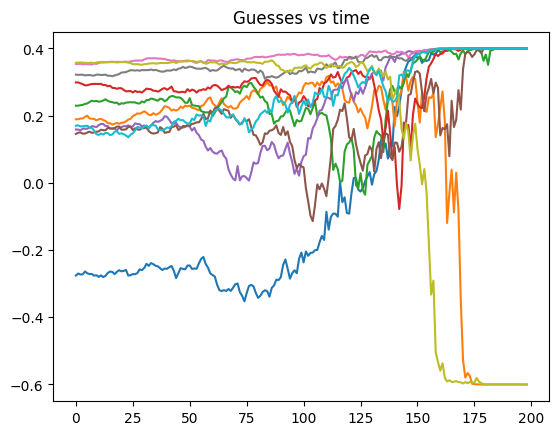

In [152]:
all_guesses = []
ts = [i for i in range(199)]
for i in tqdm(range(10)):
    values, guesses = RunUndiffuse(199, 0, np.random.randint(-30, 30), NewGuessZ)
    # guesses = [NewGuessZ(values[j], alphaBar_ts[j]) for j in range(len(values))]
    # all_guesses.append(values)
    plt.plot(ts, guesses)
# for i in all_guesses:
    
#     plt.plot(i)
plt.title("Guesses vs time")
# print(all_guesses)
# plt.plot(all_guesses)

In [55]:
import torch
import torchvision
from torch import nn

n_input, n_hidden, n_out = 2, 15, 1
net = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )
net(torch.tensor([3.0,4]))

tensor([0.0696], grad_fn=<ViewBackward0>)

In [56]:
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3) 
loss_out = []
for step in tqdm(range(0,200000)):
  opt.zero_grad()
  x0= SamplePInit()
  # Choose a random time t
  t = np.random.randint(0, 200)
  noisyData, noise = ForwardDiffusionFast2(x0, t, alpha_bar=alpha_bar)
  # call your FowardDiffusionFast (make sure you return the noisyData and the noise)
  noisyData=torch.tensor([noisyData,t]).float() # include the time for the data
  noise=torch.tensor([noise]) #make it so pytorch reads the noise

  loss=loss_fn(noise,net(noisyData))
  loss.backward()
  loss_out.append(loss.item())
  opt.step()  

100%|██████████| 200000/200000 [01:49<00:00, 1818.84it/s]


In [57]:
def rolling_avg(arr, window):
    to_return = []
    for i in range(len(arr)):
        lower = int(i-window/2)
        upper = int(i+window/2)
        if lower < 0: lower = 0
        if upper >= len(arr): upper = len(arr)-1
        to_return.append(sum(arr[lower:upper])/(upper-lower))          
    return to_return

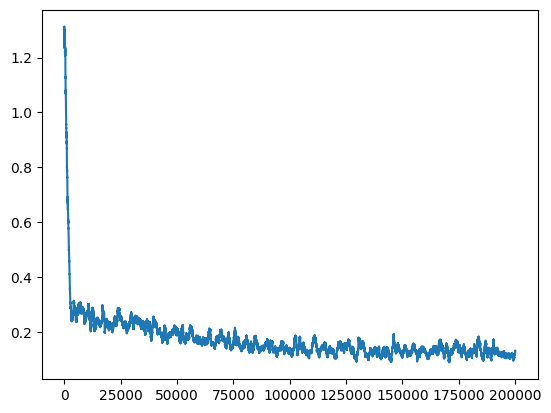

In [66]:
plt.plot((rolling_avg(loss_out, 1000)))

In [68]:
torch.set_default_dtype(torch.double)
def RunUndiffuseTorch(start_t, final_t, x_t):
    timestep = start_t
    x_ns = [np.copy(x_t)]
    while timestep != final_t:
        t = timestep
        x_guesses = []
        alphaBar_t = alphaBar_ts[timestep]
        s_t = (1 - a[timestep-1]) / np.sqrt(1 - alphaBar_t)
        if timestep == final_t+1:
            # print(s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))
            # print(0.4 - x_t)
            # print((s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))/(0.4 - x_t))
            nom = 0
        else:
            Beta_squiggle = (1 - alphaBar_ts[timestep-1]) * beta[t] / (1 - alphaBar_t)
            nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
        x_ns.append((1 / np.sqrt(alpha[timestep-1])) * (x_ns[-1] - s_t * net(torch.tensor([np.float32(x_ns[-1]), np.float32(alphaBar_t)])).detach().numpy()[0]) + nom)
        x_guesses.append((x_ns[-1] - np.sqrt(1 - alphaBar_t) * net(torch.tensor([np.float32(x_ns[-1]), np.float32(alphaBar_t)])).detach().numpy()[0])/np.sqrt(alphaBar_t))
        # x_ns.append(undiffuse(x_ns[-1], timestep))
        timestep -= 1
    return x_ns, x_guesses


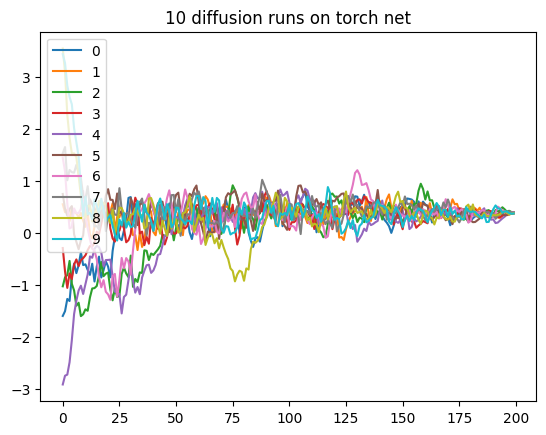

In [70]:
for i in range(10):
    plt.plot(RunUndiffuseTorch(199, 00, np.random.uniform(-3, 5))[0], label=f"{i}")
plt.title("10 diffusion runs on torch net")
plt.legend()

In [71]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuseTorch(199, 00, 0.4)[0][-1])


100%|██████████| 1000/1000 [00:17<00:00, 56.57it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion with torch')

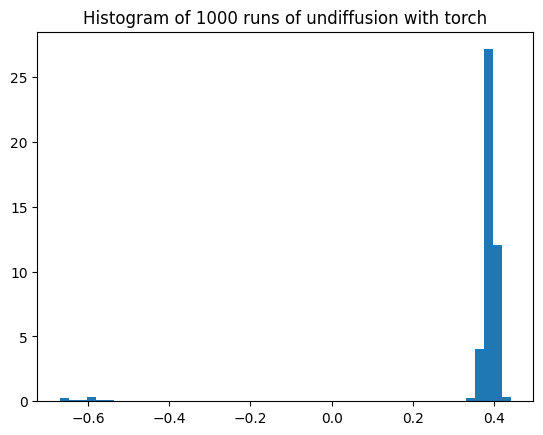

In [73]:
plt.hist(out, density=True, bins=50)
plt.title("Histogram of 1000 runs of undiffusion with torch")

100%|██████████| 10/10 [00:00<00:00, 39.65it/s]


Text(0.5, 1.0, 'Guesses vs time (torch)')

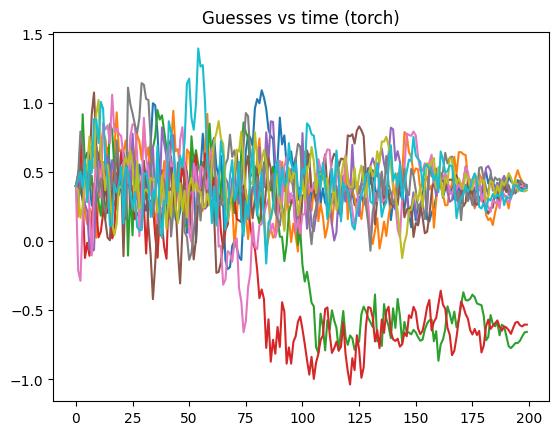

In [89]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuseTorch(199, 0, 0.4)[0]
    
    guesses = [net(torch.tensor([np.float32(values[j]), np.float32(alphaBar_ts[j])])).detach().numpy()[0] for j in range(len(values))]
    all_guesses.append(values)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time (torch)")

In [153]:
n_input, n_hidden, n_out = 3, 15, 1
net2 = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )


In [154]:

loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net2.parameters(), lr=1e-3) 
loss_out = []
for step in tqdm(range(0,200000)):
  opt.zero_grad()
  x0= SamplePInit()
  # Choose a random time t
  t = np.random.randint(0, 200)
  noisyData, noise = ForwardDiffusionFast2(x0, t, alpha_bar=alpha_bar)
  # call your FowardDiffusionFast (make sure you return the noisyData and the noise)
  if (x0 < 0):
      prompt = -1
  else:
      prompt = 1
  noisyData=torch.tensor([noisyData,t, prompt]).double() # include the time for the data
  noise=torch.tensor([noise]).double() #make it so pytorch reads the noise

  loss=loss_fn(noise,net2(noisyData))
  loss.backward()
  loss_out.append(loss.item())
  opt.step()  

100%|██████████| 200000/200000 [01:46<00:00, 1881.97it/s]


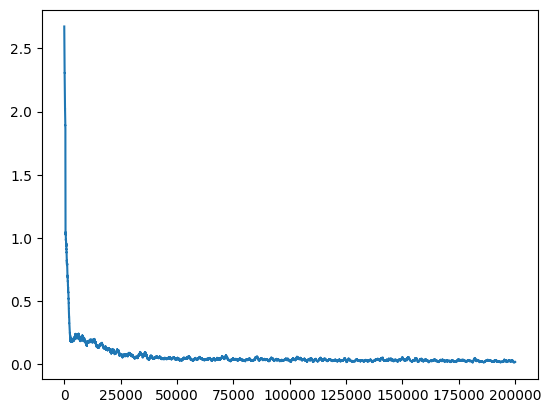

In [159]:
plt.plot((rolling_avg(loss_out, 1000)))

In [179]:
torch.set_default_dtype(torch.double)

def RunUndiffuseTorchPrompt(start_t, final_t, x_t, prompt):
    timestep = start_t
    x_guesses = []
    x_ns = [np.copy(x_t)]
    while timestep != final_t:
        t = timestep
        
        alphaBar_t = alphaBar_ts[timestep]
        s_t = (1 - a[timestep-1]) / np.sqrt(1 - alphaBar_t)
        if timestep == final_t+1:
            # print(s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))
            # print(0.4 - x_t)
            # print((s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))/(0.4 - x_t))
            nom = 0
        else:
            Beta_squiggle = (1 - alphaBar_ts[timestep-1]) * beta[t] / (1 - alphaBar_t)
            nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
        o = net2(torch.tensor([np.float32(x_ns[-1]), np.float32(alphaBar_t), np.float32(prompt)]).double()).detach().numpy()[0]
        x_ns.append((1 / np.sqrt(alpha[timestep-1])) * (x_ns[-1] - s_t * o) + nom)
        x_guesses.append((x_ns[-1] - np.sqrt(1 - alphaBar_t) * o)/np.sqrt(alphaBar_t))
        # x_ns.append(undiffuse(x_ns[-1], timestep))
        timestep -= 1
    return x_ns, x_guesses

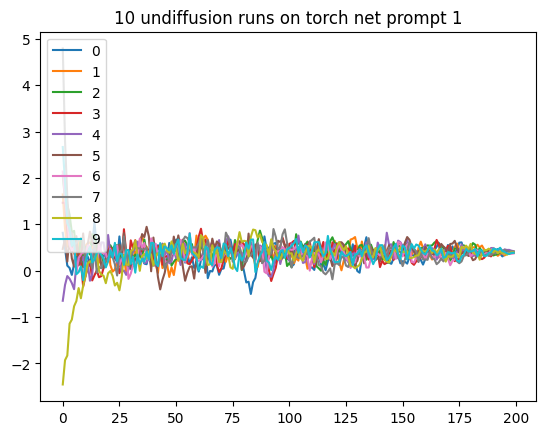

In [167]:
for i in range(10):
    plt.plot(RunUndiffuseTorchPrompt(199, 00, np.random.uniform(-3, 5), 1)[0], label=f"{i}")
plt.title("10 undiffusion runs on torch net prompt 1")
plt.legend()

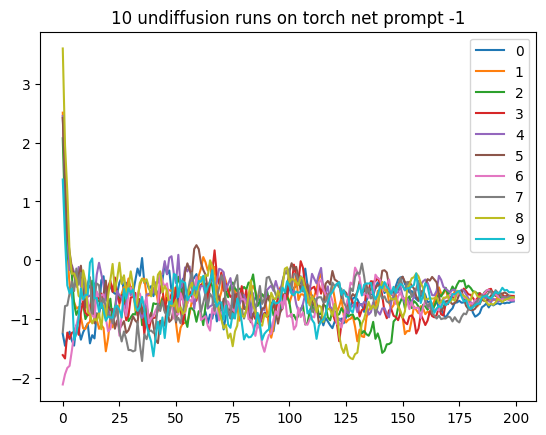

In [168]:
for i in range(10):
    plt.plot(RunUndiffuseTorchPrompt(199, 00, np.random.uniform(-3, 5), -1)[0], label=f"{i}")
plt.title("10 undiffusion runs on torch net prompt -1")
plt.legend()

100%|██████████| 1000/1000 [00:09<00:00, 104.83it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion with torch prompt 1')

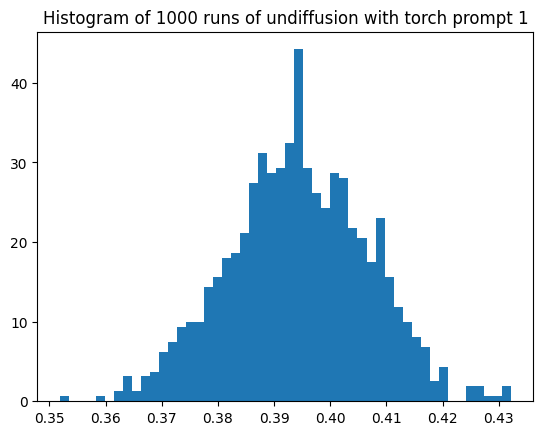

In [169]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuseTorchPrompt(199, 00, 0.4, 1)[0][-1])
plt.hist(out, density=True, bins=50)
plt.title("Histogram of 1000 runs of undiffusion with torch prompt 1")

100%|██████████| 1000/1000 [00:09<00:00, 102.88it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion with torch prompt -1')

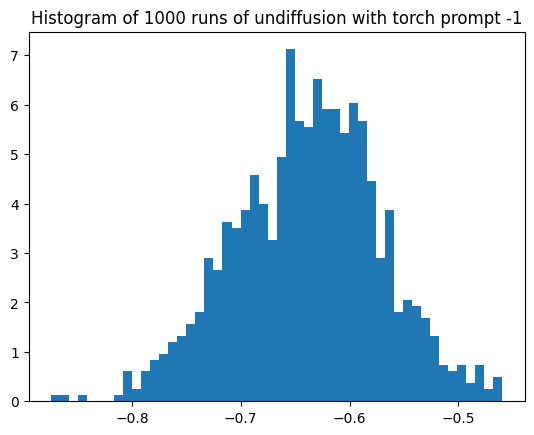

In [170]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuseTorchPrompt(199, 00, 0.4, -1)[0][-1])
plt.hist(out, density=True, bins=50)
plt.title("Histogram of 1000 runs of undiffusion with torch prompt -1")

100%|██████████| 10/10 [00:00<00:00, 54.58it/s]


Text(0.5, 1.0, 'Guesses vs time (torch) prompt 1')

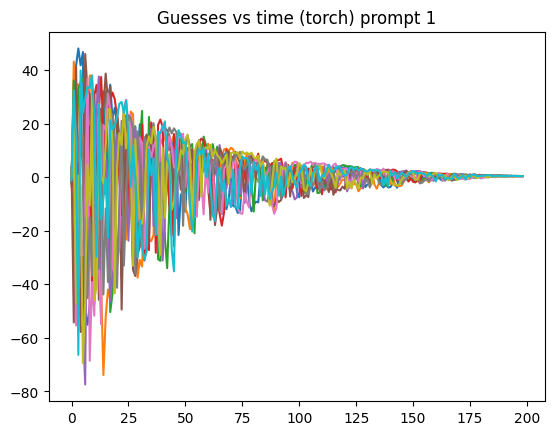

In [181]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuseTorchPrompt(199, 0, 0.4, 1)[1]
    
    guesses = [net2(torch.tensor([np.float32(values[j]), np.float32(alphaBar_ts[j]), 1]).double()).detach().numpy()[0] for j in range(len(values))]
    all_guesses.append(values)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time (torch) prompt 1")

100%|██████████| 10/10 [00:00<00:00, 55.34it/s]


Text(0.5, 1.0, 'Guesses vs time (torch) prompt -1')

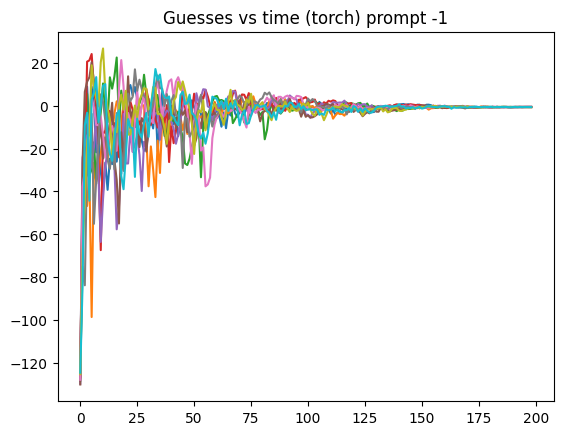

In [183]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuseTorchPrompt(199, 0, 0.4, -1)[1]
    
    guesses = [net2(torch.tensor([np.float32(values[j]), np.float32(alphaBar_ts[j]), -1]).double()).detach().numpy()[0] for j in range(len(values))]
    all_guesses.append(values)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time (torch) prompt -1")